# Introduction

The capital of India, New Delhi has a population of 257,803, but the much larger metro area has a population of more than 26 million.
The city if very diverse and has cultural taste from ranging from Chinese , Italian , French and more.

# Objectives

Where is best Chinese Cuisine in New Delhi City?
Where is the highest concentrations of Chinese Restaurant Market?
What areas have the least number of restaurants?
Where is the best place to stay if you want Chinese Cuisine ?
What areas have the highest rated restaurants in New Delhi?

# Data

New Delhi Restaurants data
List Locality
Restaurant Name
Rating 
Latitude and longitude
Data source : Zomato Kaggel Dataset
Description : This data set contains the required information. And we will use this data set to     explore various locality of new Delhi city.
Nearby places in each locality of new Delhi City.
Data source : Foursquare API
Description : Using this API we will get all the venues in each neighborhood.

# Approach

Collect Delhi City data from Zomato Kaggel dataset
Use Foursquare API to find all venues for each neighborhood.
Filter all venues that are nearby by locality.
Use aggregative rating for each restaurant to find the best places.
Visualize the ranking of neighborhoods using folium library (Python)

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                       

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [3]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

In [4]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [5]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]


In [6]:
df_Res.head()


Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

In [7]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [9]:
df_Res.head()


Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        0  
2        0  
3        0  
4        0  
5        0

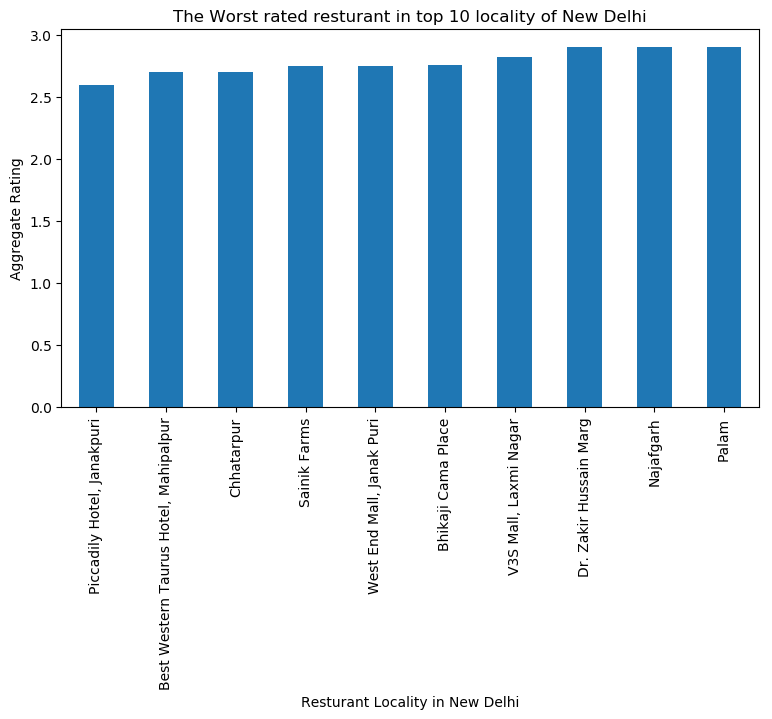

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

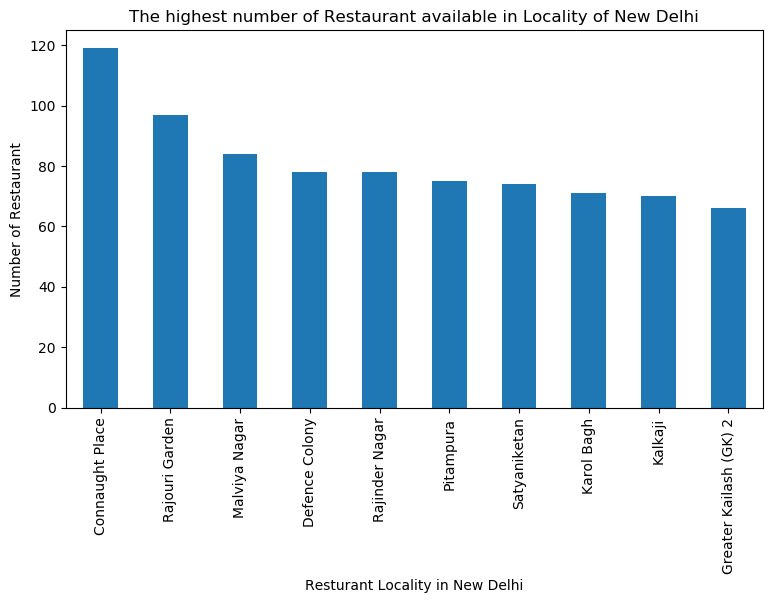

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

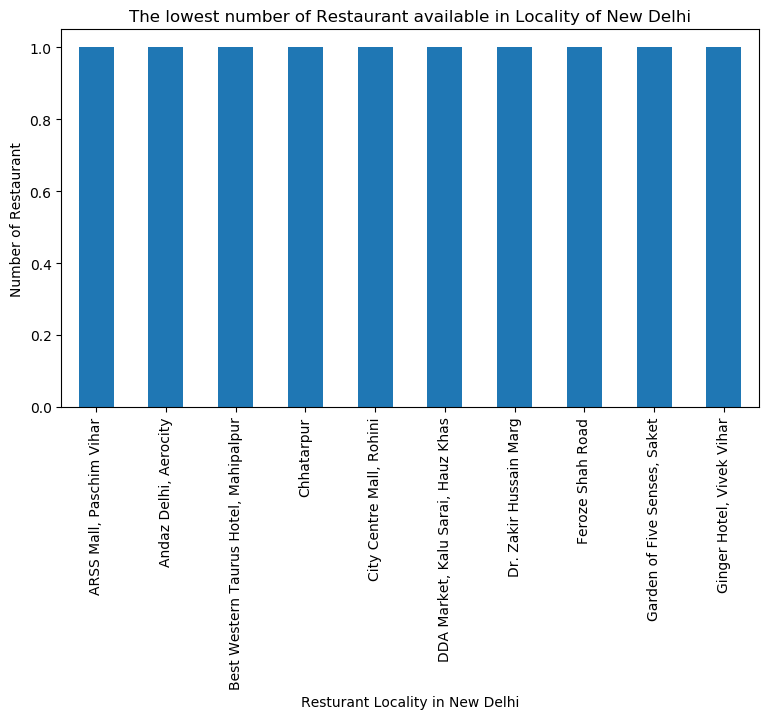

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

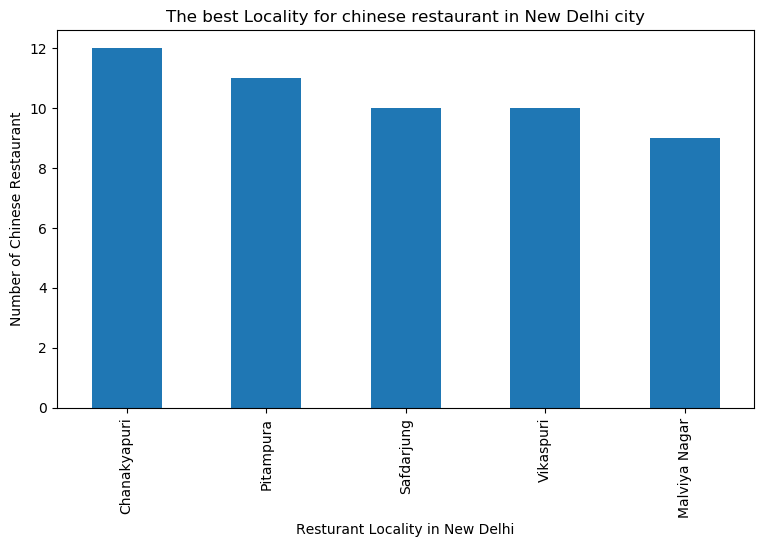

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

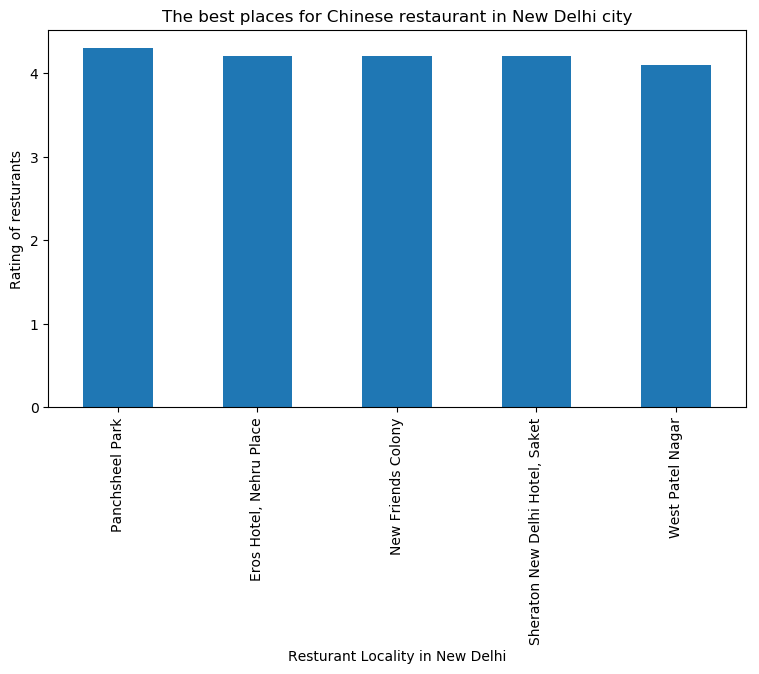

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

In [16]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [17]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [18]:
df_final.shape


(240, 8)

In [19]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


In [20]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [22]:
new_Delhi_venues.head()


Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [23]:
new_Delhi_venues.groupby('Locality').count()


Locality Latitude  \
Locality                                                            
ARSS Mall, Paschim Vihar                                        9   
Adchini                                                         6   
Aditya Mega Mall, Karkardooma                                  10   
Aerocity                                                        7   
Aggarwal City Mall, Pitampura                                   4   
Aggarwal City Plaza, Rohini                                     8   
Alaknanda                                                       4   
Ambience Mall, Vasant Kunj                                     46   
Anand Lok                                                      12   
Anand Vihar                                                     6   
Andaz Delhi, Aerocity                                          24   
Ansal Plaza Mall, Khel Gaon Marg                                7   
Asaf Ali Road                                                   6   
Ashok Vihar Phase 1                                             8   
Ashok Vihar Phase 2                                             7   
Ashok Vihar Phase 3                                             4   
Barakhamba Road                                                13   
Basant Lok Market, Vasant Vihar                                26   
Bellagio, Ashok Vihar Phase 2                                   7   
Best Western Taurus Hotel, Mahipalpur                           8   
Bhikaji Cama Place                                             15   
Chanakyapuri                                                    5   
Chander Nagar                                                   2   
Chandni Chowk                                                  18   
Chawri Bazar                                                    6   
Chhatarpur                                                      6   
Chittaranjan Park                                               4   
City Centre Mall, Rohini                                       10   
City Square Mall, Rajouri Garden                               23   
Civil Lines                                                     5   
...                                                           ...   
The Leela Ambience Convention Hotel                             5   
The Leela Palace, Chanakyapuri                                 13   
The Lodhi, Lodhi Road                                          14   
The Park, Connaught Place                                      28   
The Suryaa New Delhi, New Friends Colony                       21   
The Taj Mahal Hotel, Mansingh Road                              6   
The Taj Palace Hotel, Chanakyapuri                             34   
The Uppal, Aerocity                                             4   
The Village Restaurant Complex, Khel Gaon Marg                 11   
Tilak Nagar                                                     5   
Tughlakabad Institutional Area                                  6   
Uday Park                                                       8   
Unity One Mall, Janakpuri                                       6   
Uttam Nagar                                                     4   
V3S Mall, Laxmi Nagar                                          17   
Vasant Kunj                                                     8   
Vasant Square Mall, Vasant Kunj                                10   
Vasant Vihar                                                   29   
Vasundhara Enclave                                              1   
Vijay Nagar                                                    12   
Vikas Marg                                                      5   
Vikaspuri                                                       4   
Vivek Vihar                                                     5   
Wazirpur                                                        1   
West End Mall, Janak Puri                                      16   
West Gate Mall, Rajouri Garden                

In [24]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))


There are 212 uniques categories.


In [25]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                   0        0                   0               0   
1                   0        0                   0               0   
2                   0        0                   0               0   
3                   0        0                   0               0   
4                   0        0                   0               0   

   Airport Service  Airport Terminal  ...  Toy / Game Store  Trail  \
0                0                 0  ...                 0      0   
1                0                 0  ...                 0      0   
2                0                 0  ...                 0      0   
3                0                 0  ...                 0      0   
4                0                 0  ...                 0      0   

   Train Station  Turkish Restaurant  Udupi Restaurant  \
0              0                   0                 0   
1              0                   0                 0   
2              0                   0                 0   
3              0                   0                 0   
4              0                   0                 0   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0                      0           0   
1                              0                      0           0   
2                              0                      0           0   
3                              0                      0           0   
4                              0                      0           0   

   Wings Joint  Women's Store  
0            0              0  
1            0              0  
2            0              0  
3            0              0  
4            0              0  

[5 rows x 213 columns]

In [26]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped


Locality       ATM  \
0                          ARSS Mall, Paschim Vihar  0.111111   
1                                           Adchini  0.000000   
2                     Aditya Mega Mall, Karkardooma  0.000000   
3                                          Aerocity  0.000000   
4                     Aggarwal City Mall, Pitampura  0.000000   
5                       Aggarwal City Plaza, Rohini  0.000000   
6                                         Alaknanda  0.000000   
7                        Ambience Mall, Vasant Kunj  0.000000   
8                                         Anand Lok  0.000000   
9                                       Anand Vihar  0.000000   
10                            Andaz Delhi, Aerocity  0.000000   
11                 Ansal Plaza Mall, Khel Gaon Marg  0.000000   
12                                    Asaf Ali Road  0.000000   
13                              Ashok Vihar Phase 1  0.000000   
14                              Ashok Vihar Phase 2  0.000000   
15                              Ashok Vihar Phase 3  0.000000   
16                                  Barakhamba Road  0.000000   
17                  Basant Lok Market, Vasant Vihar  0.000000   
18                    Bellagio, Ashok Vihar Phase 2  0.000000   
19            Best Western Taurus Hotel, Mahipalpur  0.000000   
20                               Bhikaji Cama Place  0.000000   
21                                     Chanakyapuri  0.000000   
22                                    Chander Nagar  0.000000   
23                                    Chandni Chowk  0.000000   
24                                     Chawri Bazar  0.000000   
25                                       Chhatarpur  0.000000   
26                                Chittaranjan Park  0.000000   
27                         City Centre Mall, Rohini  0.000000   
28                 City Square Mall, Rajouri Garden  0.000000   
29                                      Civil Lines  0.000000   
..                                              ...       ...   
210             The Leela Ambience Convention Hotel  0.000000   
211                  The Leela Palace, Chanakyapuri  0.000000   
212                           The Lodhi, Lodhi Road  0.000000   
213                       The Park, Connaught Place  0.000000   
214        The Suryaa New Delhi, New Friends Colony  0.000000   
215              The Taj Mahal Hotel, Mansingh Road  0.000000   
216              The Taj Palace Hotel, Chanakyapuri  0.000000   
217                             The Uppal, Aerocity  0.000000   
218  The Village Restaurant Complex, Khel Gaon Marg  0.000000   
219                                     Tilak Nagar  0.000000   
220                  Tughlakabad Institutional Area  0.000000   
221                                       Uday Park  0.000000   
222                       Unity One Mall, Janakpuri  0.000000   
223                                     Uttam Nagar  0.500000   
224                           V3S Mall, Laxmi Nagar  0.000000   
225                                     Vasant Kunj  0.000000   
226                 Vasant Square Mall, Vasant Kunj  0.000000   
227                                    Vasant Vihar  0.000000   
228                              Vasundhara Enclave  1.000000   
229                                     Vijay Nagar  0.000000   
230                                      Vikas Marg  0.000000   
231                                       Vikaspuri  0.000000   
232                                     Vivek Vihar  0.000000   
233                                        Wazirpur  0.000000   
234                       West End Mall, Janak Puri  0.000000   
235                  West Gate Mall, Rajouri Garden  0.000000   
236                                West Patel Nagar  0.000000   
237                           Worldmark 1, Aerocity  0.000000   
238                                     Yusuf Sarai  0.083333   
239                        ibis New Delhi, Aerocity  0.000000   

     Accesso

In [27]:
New_Delhi_grouped.shape


(240, 213)

In [28]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                            venue  freq
0               Indian Restaurant  0.22
1                             ATM  0.11
2                     Coffee Shop  0.11
3                     Pizza Place  0.11
4  Multicuisine Indian Restaurant  0.11


----Adchini----
               venue  freq
0  Indian Restaurant  0.33
1               Café  0.33
2   Parsi Restaurant  0.17
3                Pub  0.17
4                ATM  0.00


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1  Indian Restaurant   0.2
2      Shopping Mall   0.2
3          Multiplex   0.2
4              Hotel   0.1


----Aerocity----
                 venue  freq
0                Hotel  0.29
1  Rental Car Location  0.14
2       Airport Lounge  0.14
3     Airport Terminal  0.14
4          Coffee Shop  0.14


----Aggarwal City Mall, Pitampura----
               venue  freq
0               Café  0.25
1   Department Store  0.25
2        Pizza Place  0.25
3  I

In [29]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality    1st Most Common Venue  \
0                          ARSS Mall, Paschim Vihar        Indian Restaurant   
1                                           Adchini        Indian Restaurant   
2                     Aditya Mega Mall, Karkardooma        Indian Restaurant   
3                                          Aerocity                    Hotel   
4                     Aggarwal City Mall, Pitampura        Indian Restaurant   
5                       Aggarwal City Plaza, Rohini        Indian Restaurant   
6                                         Alaknanda              Coffee Shop   
7                        Ambience Mall, Vasant Kunj              Coffee Shop   
8                                         Anand Lok                  Stadium   
9                                       Anand Vihar                     Café   
10                            Andaz Delhi, Aerocity                    Hotel   
11                 Ansal Plaza Mall, Khel Gaon Marg         Department Store   
12                                    Asaf Ali Road        Indian Restaurant   
13                              Ashok Vihar Phase 1        Indian Restaurant   
14                              Ashok Vihar Phase 2        Indian Restaurant   
15                              Ashok Vihar Phase 3              Pizza Place   
16                                  Barakhamba Road        Indian Restaurant   
17                  Basant Lok Market, Vasant Vihar                     Café   
18                    Bellagio, Ashok Vihar Phase 2        Indian Restaurant   
19            Best Western Taurus Hotel, Mahipalpur                    Hotel   
20                               Bhikaji Cama Place                    Hotel   
21                                     Chanakyapuri             Concert Hall   
22                                    Chander Nagar              Pizza Place   
23                                    Chandni Chowk        Indian Restaurant   
24                                     Chawri Bazar        Indian Restaurant   
25                                       Chhatarpur        Indian Restaurant   
26                                Chittaranjan Park                   Market   
27                         City Centre Mall, Rohini            Shopping Mall   
28                 City Square Mall, Rajouri Garden     Fast Food Restaurant   
29                                      Civil Lines              Coffee Shop   
..                                              ...                      ...   
210             The Leela Ambience Convention Hotel        Indian Restaurant   
211                  The Leela Palace, Chanakyapuri        Indian Restaurant   
212                           The Lodhi, Lodhi Road        Indian Restaurant   
213                       The Park, Connaught Place                    Hotel   
214        The Suryaa New Delhi, New Friends Colony                     Café   
215              The Taj Mahal Hotel, Mansingh Road        Indian Restaurant   
216              The Taj Palace Hotel, Chanakyapuri        Indian Restaurant   
217                             The Uppal, Aerocity                    Hotel   
218  The Village Restaurant Complex, Khel Gaon Marg                      Bar   
219                                     Tilak Nagar     Fast Food Restaurant   
220                  Tughlakabad Institutional Area               Restaurant   
221                                       Uday Park                     Park   
222                       Unity One Mall, Janakpuri           Sandwich Place   
223                                     Uttam Nagar        Indian Restaurant   
224                           V3S Mall, Laxmi Nagar        Indian Restaurant   
225                                     Vasant Kunj                      Spa   
226                 Vasant Square Mall, Vasant Kunj                     Bank   
227                                    Vasant Vihar                     Café   
228                              Vasundhara

In [37]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(240,)

In [38]:
# add clustering labels
New_Delhi_merged = df_final.head(240)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               0   
1  Average, Good, Poor, Very Good         1560               4   
2                   Average, Good          434               0   
3                         Average           59               1   
4                         Average          126               4   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant        Sandwich Place    Chinese Restaurant   
1     Indian Restaurant                  Café      Parsi Restaurant   
2     Indian Restaurant         Shopping Mall           Pizza Place   
3                 Hotel   Rental Car Location           Coffee Shop   
4     Indian Restaurant           Pizza Place      Department Store   

  4th Most Common Venue 5th Most Common Venue           6th Most Common Venue  \
0           Coffee Shop                Market  Multicuisine Indian Restaurant   
1                   Pub    English Restaurant                      Food Truck   
2             Multiplex                 Hotel                            Café   
3        Airport Lounge  Fast Food Restaurant                Airport Terminal   
4                  Café    English Restaurant                      Food Truck   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0           Pizza Place                   ATM                 Trail   
1            Food Court     Food & Drink Shop                  Food   
2    English Restaurant     Food & Drink Shop                  Food   
3     Fish & Chips Shop           Event Space    Falafel Restaurant   
4            Food Court     Food & Drink Shop                  Food   

        10th Most Common Venue  
0  Eastern European Restaurant  
1                  Flea Market  
2                  Flea Market  
3               Farmers Market  
4                  Flea Market

In [39]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [40]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
0    28.668945    3.100000                              Average          117   
2    28.656131    3.275000                        Average, Good          434   
5    28.700516    3.040000                  Average, Good, Poor          594   
12   28.641698    3.050000                              Average           17   
13   28.690182    3.090000                  Average, Good, Poor          971   
14   28.693969    3.378571                        Average, Good         2343   
18   28.696302    3.300000                        Average, Good          415   
22   28.654105    3.085714                              Average           80   
23   28.656414    3.358182             Average, Good, Very Good         6668   
24   28.649658    3.800000  Average, Excellent, Good, Very Good         1410   
28   28.650254    3.166667                        Average, Good         1217   
33   28.657388    3.320000                        Average, Good          636   
36   28.692546    3.480000                        Average, Good          948   
42   28.576161    2.983333                  Average, Good, Poor          542   
43   28.643320    3.287500       Average, Good, Poor, Very Good         2570   
47   28.681582    3.046875                  Average, Good, Poor         1224   
49   28.602169    2.900000                              Average            7   
55   28.617102    4.200000                            Very Good         3010   
61   28.668181    3.400000                              Average           33   
71   28.641003    3.650000                        Average, Good          367   
77   28.631728    3.060714       Average, Good, Poor, Very Good         1650   
80   28.611614    3.366667                        Average, Good          291   
84   28.630942    3.122000       Average, Good, Poor, Very Good         1738   
85   28.648885    3.561111             Average, Good, Very Good         7411   
92   28.584294    3.100000                              Average           35   
94   28.538153    3.117143                  Average, Good, Poor         3642   
97   28.662972    3.533333                   Average, Very Good          293   
99   28.648795    3.238028       Average, Good, Poor, Very Good         7282   
103  28.652501    3.080000                  Average, Good, Poor         2196   
104  28.656263    3.097619                        Average, Good          965   
113  28.541242    2.984615                              Average          817   
116  28.486576    2.950000                              Average            8   
118  28.646549    3.200000                              Average           20   
126  28.602860    2.973214                  Average, Good, Poor         1831   
133  28.708185    3.344444             Average, Good, Very Good          568   
138  28.556145    3.040909                  Average, Good, Poor          637   
142  28.693270    3.519149             Average, Good, Very Good         7642   
144  28.591092    3.200000                  Average, Good, Poor          993   
153  28.608055    3.860000             Average, Good, Very Good         7978   
156  28.630734    3.185714                        Average, Good          244   
160  28.712975    3.066667                              Average          121   
165  28.539464    2.900000                              Average           14   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
176  28.562460    3.269231       Average, Good, Poor, Very Good         8739   
177  28.511482    2.750000                        Average, Poor          107   
181  28.571849    3.316667                        Average, Good          472   
193  28.569983    3.133333                  Average, Good, Poor          988   
199  28.601779    3.700000             Average, Good, Very Good          964   
204  28.597038    3.533333             Average, Good, Very Good          902   
209  28.631

In [41]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
19   28.548827    2.700000                              Average            9   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
120  28.673708    3.133333                              Average          113   
128  28.608252    2.945000                        Average, Good          406   
146  28.535040    3.175000                        Average, Good           60   
149  28.642910    2.996552       Average, Good, Poor, Very Good         2850   
162  28.725814    3.050000                              Average           50   
163  28.552711    3.100000                              Average            7   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
169  28.667261    3.200000                              Average           76   
174  28.550802    3.250000                        Average, Good           34   
197  28.592724    2.985714                              Average          560   
205  28.600171    3.714286             Average, Good, Very Good         1733   
217  28.535183    3.066667                              Average           37   
237  28.550257    3.220000                        Average, Good           77   
239  28.551398    3.100000                              Average            9   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 1                 Hotel   Rental Car Location   
10                1                 Hotel           Coffee Shop   
19                1                 Hotel     Indian Restaurant   
35                1                 Hotel     Indian Restaurant   
56                1                 Hotel                   Gym   
60                1                 Hotel     Indian Restaurant   
69                1                 Hotel             Hotel Bar   
70                1                 Hotel            Restaurant   
83                1                 Hotel             Hotel Bar   
111               1                 Hotel     Indian Restaurant   
112               1                 Hotel             Hotel Bar   
119               1                 Hotel     Indian Restaurant   
120               1     Indian Restaurant                 Hotel   
128               1                 Hotel         Women's Store   
146               1            Restaurant                 Hotel   
149               1                 Hotel     Indian Restaurant   
162               1                 Hotel                  Café   
163               1                 Hotel             Hotel Bar   
168               1                 Hotel     Indian Restaurant   
169               1                 Hotel     Indian Restaurant   
174               1                 Hotel             Hotel Bar   
197               1                 Hotel      Department Store   
205               1                 Hotel    Chinese Restaurant   
217               1                 Hotel     Indian Restaurant   
237               1                 Hotel             Hotel Bar   
239               1                 Hotel             Hotel Bar   

    3rd Most Common Venue 4th Most Commo

In [42]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
6    28.527088    3.117391                  Average, Good, Poor         1012   
7    28.541298    3.425000             Average, Good, Very Good         2460   
8    28.555599    3.800000                   Average, Very Good         2411   
11   28.562580    3.750000             Average, Good, Very Good          875   
15   28.691136    3.390909             Average, Good, Very Good          485   
17   28.557846    3.220000                  Average, Good, Poor         1875   
20   28.568193    2.755556                        Average, Poor          339   
25   28.495624    2.700000                              Average           23   
26   28.538688    3.130303                  Average, Good, Poor         2578   
27   28.716874    3.400000                              Average          134   
29   28.681233    3.300000             Average, Good, Very Good          769   
31   28.632091    3.779832  Average, Excellent, Good, Very Good       128107   
32   28.718351    3.150000                        Average, Good          494   
34   28.720602    3.600000                                 Good          119   
37   28.541903    3.000000                              Average            4   
38   28.702961    3.225000                        Average, Good          168   
39   28.543269    3.650000                                 Good          201   
40   28.528657    3.700000             Average, Good, Very Good         5920   
41   28.542647    3.761538             Average, Good, Very Good         1946   
44   28.574288    3.496154       Average, Good, Poor, Very Good        15579   
46   28.573241    3.225000                  Average, Good, Poor         1106   
48   28.630149    2.950000                  Average, Good, Poor          471   
50   28.645084    3.235000       Average, Good, Poor, Very Good         2578   
51   28.557166    3.080000                   Average, Very Good         1120   
52   28.551417    3.505000             Average, Good, Very Good         7446   
53   28.549856    3.720000             Average, Good, Very Good          352   
54   28.543798    3.500000                        Average, Good          502   
57   28.699837    3.376471             Average, Good, Very Good         2460   
58   28.514237    4.200000                            Very Good         1561   
59   28.654883    3.053846                        Average, Good          262   
..         ...         ...                                  ...          ...   
187  28.629634    2.942857                              Average          151   
188  28.707685    3.168182             Average, Good, Very Good         1668   
189  28.620715    3.880000             Average, Good, Very Good          626   
191  28.522279    3.100000                              Average           14   
192  28.526856    4.066667                            Very Good          802   
194  28.566717    3.303125             Average, Good, Very Good         2411   
195  28.527731    3.450000                        Average, Good          396   
196  28.680905    3.320000                        Average, Good          286   
198  28.636712    3.023529                        Average, Poor          185   
200  28.564288    3.200000                              Average            6   
202  28.646593    3.280952             Average, Good, Very Good         1624   
203  28.601187    3.633333                        Average, Good         1018   
206  28.538993    3.450000                        Average, Good          242   
207  28.625445    3.600000             Average, Good, Very Good          843   
211  28.579556    3.780000                                 Good          709   
212  28.592147    3.350000                        Average, Good          189   
213  28.623619    3.466667                        Average, Good         1141   
215  28.605069    3.785714             Average, Good, Very Good         1976   
216  28.594

In [43]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating Comments  No_of_Votes  Cluster Labels  \
233  28.695096        3.05  Average           86               3   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
233                  Bank         Women's Store    Falafel Restaurant   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
233   Fried Chicken Joint     French Restaurant            Food Truck   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
233            Food Court     Food & Drink Shop                  Food   

    10th Most Common Venue  
233            Flea Market

In [44]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
1    28.537063    3.292308             Average, Good, Poor, Very Good   
4    28.690020    3.033333                                    Average   
9    28.659870    3.281481                              Average, Good   
16   28.630440    3.208333                        Average, Good, Poor   
21   28.589797    3.085714                        Average, Good, Poor   
30   28.561898    3.100000                              Average, Good   
45   28.696802    3.296296  Average, Excellent, Good, Poor, Very Good   
82   28.548371    3.137500                        Average, Good, Poor   
86   28.624632    3.315217  Average, Excellent, Good, Poor, Very Good   
89   28.539003    3.150000                        Average, Good, Poor   
100  28.556869    4.500000                                  Excellent   
108  28.563827    3.800000                            Good, Very Good   
110  28.635391    3.040385             Average, Good, Poor, Very Good   
123  28.626791    3.250000                                    Average   
127  28.619410    3.134615                        Average, Good, Poor   
135  28.579641    3.180000                              Average, Good   
140  28.627959    3.004167                                    Average   
143  28.564494    3.140625                   Average, Good, Very Good   
147  28.523307    3.430769             Average, Good, Poor, Very Good   
171  28.639604    3.056410             Average, Good, Poor, Very Good   
172  28.644281    3.626804  Average, Excellent, Good, Poor, Very Good   
175  28.546931    3.223077                              Average, Good   
180  28.534499    3.000000                        Average, Good, Poor   
182  28.587918    3.541892  Average, Excellent, Good, Poor, Very Good   
190  28.577107    3.100000                                    Average   
201  28.651299    3.500000                              Average, Good   
208  28.562469    2.971429                        Average, Good, Poor   
210  28.661133    3.775000                            Good, Very Good   
214  28.561105    3.425000                              Average, Good   
221  28.560593    3.733333                   Average, Good, Very Good   
229  28.692519    3.606452        Average, Excellent, Good, Very Good   
230  28.658041    3.400000                                    Average   
235  28.652978    3.500000                                       Good   

     No_of_Votes  Cluster Labels    1st Most Common Venue  \
1           1560               4        Indian Restaurant   
4            126               4        Indian Restaurant   
9           1309               4                     Café   
16          1779               4        Indian Restaurant   
21          1617               4             Concert Hall   
30          1514               4                     Café   
45         19479               4                     Café   
82           609               4        Indian Restaurant   
86          4011               4                     Café   
89           893               4             Soccer Field   
100          524               4                     Café   
108         1092               4        Indian Restaurant   
110         2442               4        Indian Restaurant   
123           57               4                  Theater   
127         1648               4              Wings Joint   
135          202               4              Pizza Place   
140          326               4        Indian Restaurant   
143         1548               4                     Café   
147         2412               4              Pizza Place   
171         5168               4              Pizza Place   
172        25637               4        Indian Restaurant   
175          606               4                     Café   
180          173               4                     Café   
182        16386               4                     Café   
190

# Conclusion

Chanakyapuri, Pitampura, Safdarjung best neighborhoods for Chinese cuisine.
Panchsheel park and Nehru place have the best Chinese Restaurant.
Connaught place, Rajouri garden and Malviya nagar are the best places to eat.
Greater kailash, Feroze shah road, Saket have best rated restaurants in New Delhi.